In [1]:
# === Step 1: Unzip Dataset ===
import zipfile
import os

zip_path = 'cancerdataset.zip'  # Place your zip file in working dir
extract_path = 'cancer_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted structure
print(os.listdir(extract_path))


['cancerdataset']


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.models import load_model


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# === Define Paths ===
train_path = os.path.join(extract_path, 'cancerdataset/train')
test_path = os.path.join(extract_path, 'cancerdataset/test')

# === Data Generators with Validation Split ===
train_val_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% validation
)

# === Training Data (80%) ===
train_data = train_val_gen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# === Validation Data (20%) ===
val_data = train_val_gen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

# === Test Data (Separate) ===
test_gen = ImageDataGenerator(rescale=1./255)

test_data = test_gen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 2110 images belonging to 2 classes.
Found 527 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [12]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(train_data, epochs=10, validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5924 - loss: 0.8023

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.5934 - loss: 0.7999 - val_accuracy: 0.7495 - val_loss: 0.5458
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.7621 - loss: 0.4950 - val_accuracy: 0.7552 - val_loss: 0.4905
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.7771 - loss: 0.4252 - val_accuracy: 0.7116 - val_loss: 0.6161
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.7942 - loss: 0.4090 - val_accuracy: 0.7818 - val_loss: 0.4700
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8051 - loss: 0.3651 - val_accuracy: 0.7723 - val_loss: 0.4774
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.8324 - loss: 0.3505 - val_accuracy: 0.7173 - val_loss: 0.5081
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.8286 - loss: 0.3554 - val_accuracy: 0.7457 - val_loss: 0.5136
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8281 - loss: 0.3613 - val_accuracy: 0.7970 - val_loss: 0.

In [17]:
# Save model
model.save('/content/cancer_classifier_model.h5')


In [18]:
# Load model (for testing or reuse)
loaded_model = load_model('/content/cancer_classifier_model.h5')

21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 481ms/step - accuracy: 0.7702 - loss: 0.4082
Test Accuracy: 82.12%


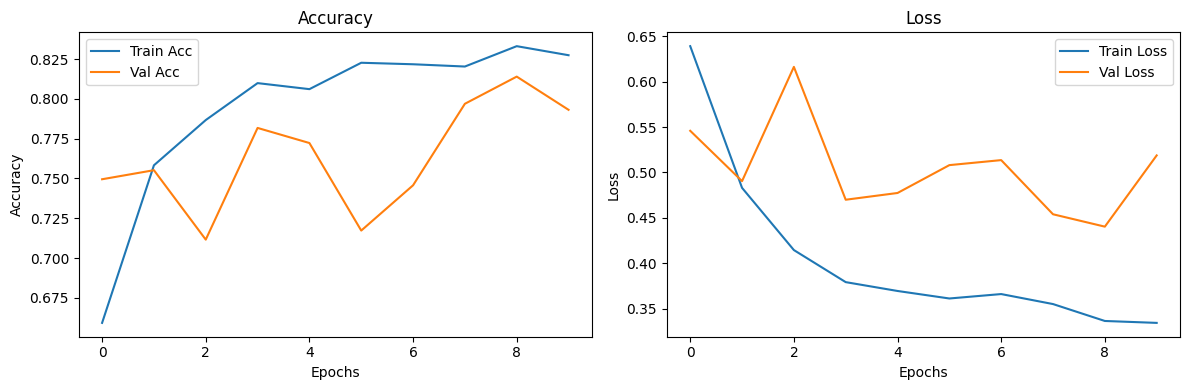

In [19]:
# Print final test accuracy
loss, acc = loaded_model.evaluate(test_data)
print(f"Test Accuracy: {acc*100:.2f}%")

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


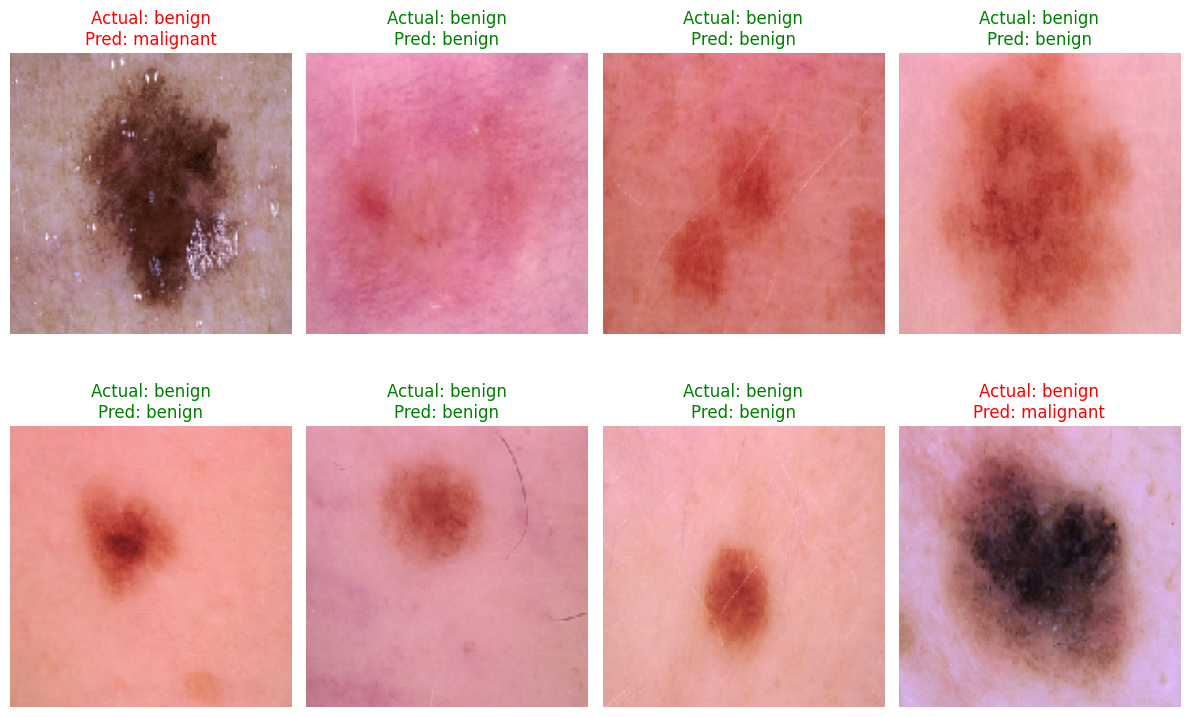

In [20]:
class_names = list(test_data.class_indices.keys())
test_images, test_labels = next(test_data)

predictions = loaded_model.predict(test_images)
predicted_labels = (predictions > 0.5).astype("int").flatten()

plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(test_images[i])
    actual = class_names[int(test_labels[i])]
    predicted = class_names[int(predicted_labels[i])]
    color = 'green' if actual == predicted else 'red'
    plt.title(f"Actual: {actual}\nPred: {predicted}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()
